In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sys
import time
import numpy as np
import math
import pandas as pd
from datetime import datetime
from torch.autograd import Variable

In [3]:
try:
    df = pd.read_csv('power_usage_data.csv')  
    print("Load file success")
except:
    print("Load file faild!")
    sys.exit(0)

arr = np.array(df.iloc[1:,0])
#print(arr)  
#print(df.columns)  

Load file success


In [4]:
num = np.array(df.iloc[1:,0])                                  #date
net_peak = np.array(df.iloc[1:,1]).astype(np.float)            #net peak
peak = np.array(df.iloc[1:,2]).astype(np.float)                #peak
operating_reserve = np.array(df.iloc[1:,3]).astype(np.float)   #Operating Reserve
P_operating_reserve = np.array(df.iloc[1:,4]).astype(np.float) #Percent Operating Reserve
industry_useage = np.array(df.iloc[1:,5]).astype(np.float)     #industry useage
house_useage = np.array(df.iloc[1:,6]).astype(np.float)        #industry useage


num_t = [datetime.strptime(format(nums), '%Y%m%d').date() for nums in num]

print(len(num_t))

395


In [5]:
peak1 = []
peak2 = []
peak3 = []
peak4 = []
peak5 = []
peak6 = []
peak7 = []

for i in range(len(num_t)):
  if(i%7==0):
    peak1 = np.append(peak1,peak[i])
  elif(i%7==1):
    peak2 = np.append(peak2,peak[i])
  elif(i%7==2):
    peak3 = np.append(peak3,peak[i])
  elif(i%7==3):
    peak4 = np.append(peak4,peak[i])
  elif(i%7==4):
    peak5 = np.append(peak5,peak[i])
  elif(i%7==5):
    peak6 = np.append(peak6,peak[i])
  elif(i%7==6):
    peak7 = np.append(peak7,peak[i])

peak1_ = peak1  +
    
print(type(peak1))

<class 'numpy.ndarray'>


In [6]:
num1 = np.arange(0,2*len(peak1)) 
num2 = np.arange(0,len(peak2)) 
num3 = np.arange(0,len(peak3)) 
num4 = np.arange(0,len(peak4)) 
num5 = np.arange(0,len(peak5)) 
num6 = np.arange(0,len(peak6)) 
num7 = np.arange(0,len(peak7)) 

Text(0.5, 1.0, 'peak7 (MW)')

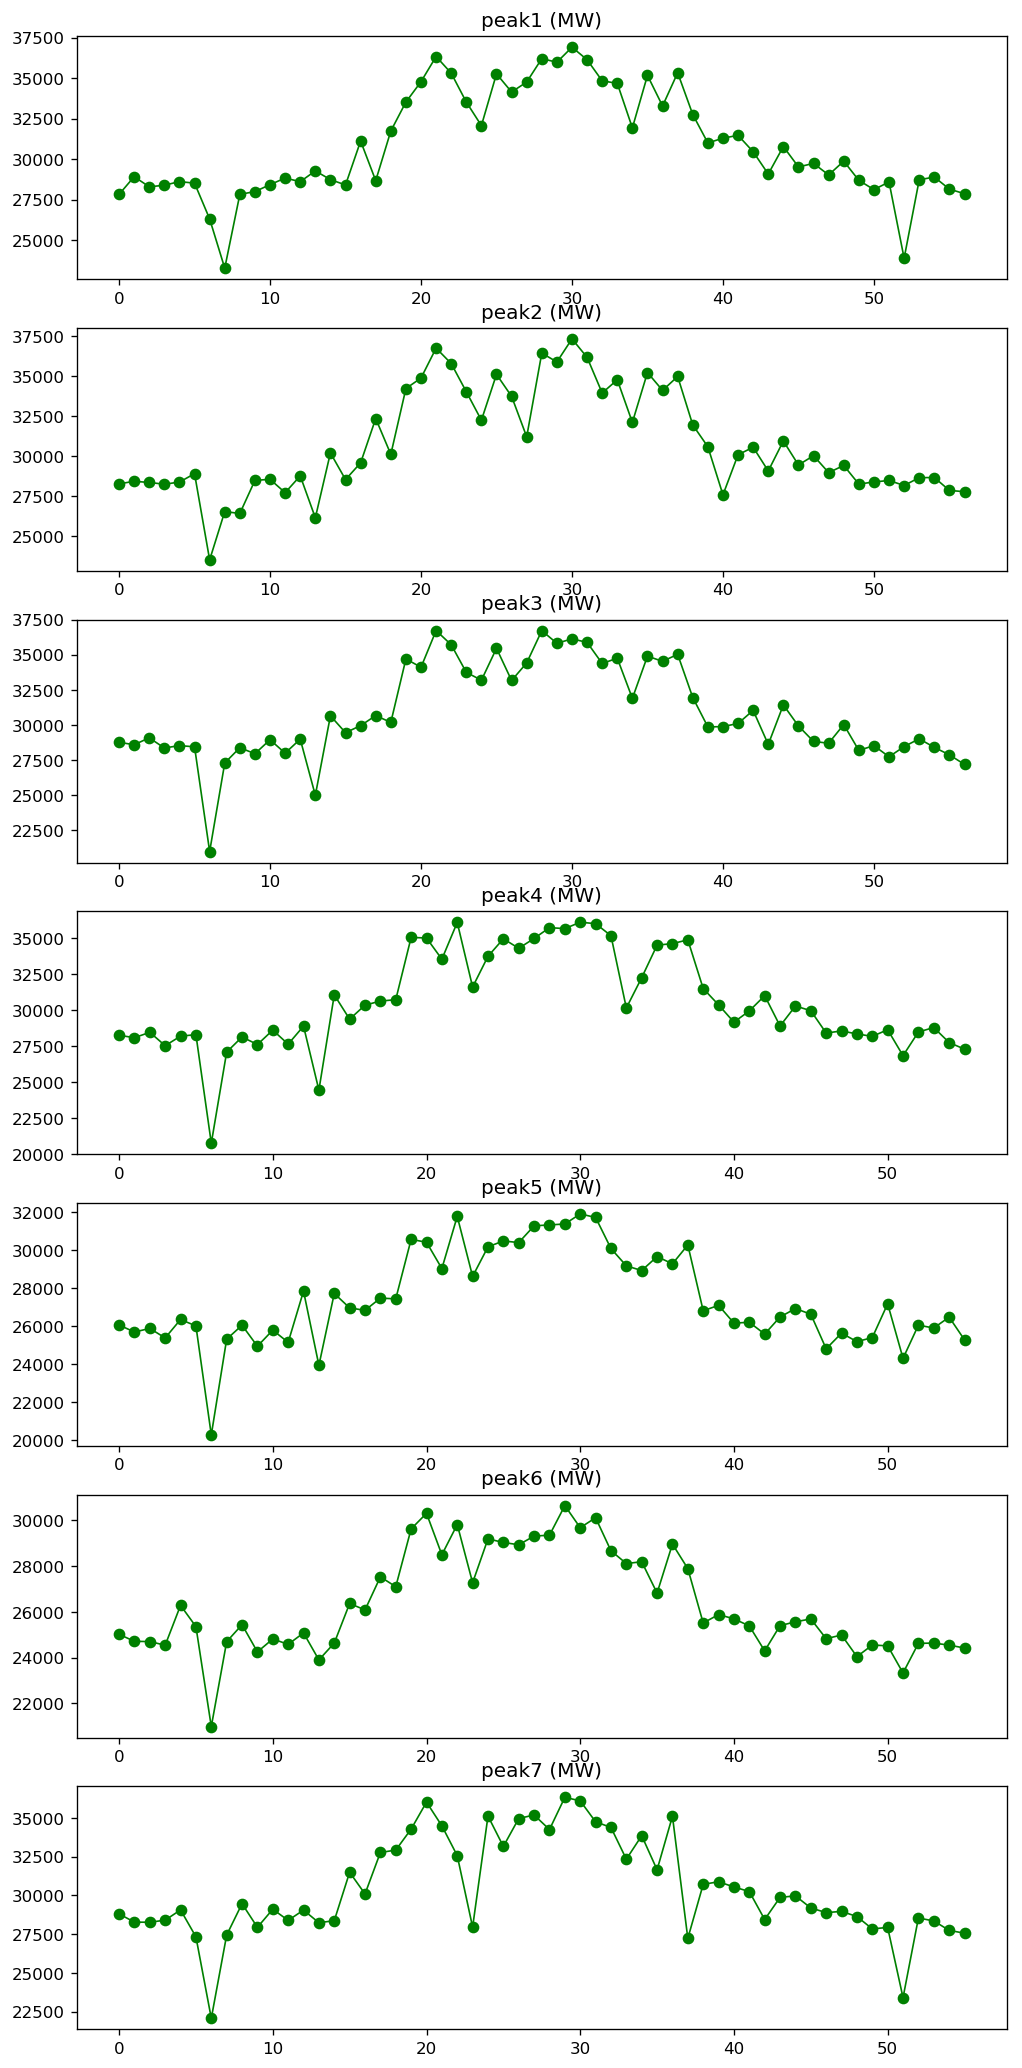

In [7]:
fig = plt.figure(figsize=(10,22),dpi=120)
ax1 = fig.add_subplot(7,1,1)
ax2 = fig.add_subplot(7,1,2)
ax3 = fig.add_subplot(7,1,3)
ax4 = fig.add_subplot(7,1,4)
ax5 = fig.add_subplot(7,1,5)
ax6 = fig.add_subplot(7,1,6)
ax7 = fig.add_subplot(7,1,7)

ax1.plot(num1,peak1, lw=1, c='g', marker='o')
ax1.set_title('peak1 (MW)')

ax2.plot(num2,peak2, lw=1, c='g', marker='o')
ax2.set_title('peak2 (MW)')

ax3.plot(num3,peak3, lw=1, c='g', marker='o')
ax3.set_title('peak3 (MW)')

ax4.plot(num4,peak4, lw=1, c='g', marker='o')
ax4.set_title('peak4 (MW)')

ax5.plot(num5,peak5, lw=1, c='g', marker='o')
ax5.set_title('peak5 (MW)')

ax6.plot(num6,peak6, lw=1, c='g', marker='o')
ax6.set_title('peak6 (MW)')

ax7.plot(num7,peak7, lw=1, c='g', marker='o')
ax7.set_title('peak7 (MW)')


In [8]:
number = np.arange(0,len(num)) 

peak1 = torch.unsqueeze(torch.from_numpy(peak1), dim=1).float()
peak2 = torch.unsqueeze(torch.from_numpy(peak2), dim=1).float()
peak3 = torch.unsqueeze(torch.from_numpy(peak3), dim=1).float()
peak4 = torch.unsqueeze(torch.from_numpy(peak4), dim=1).float()
peak5 = torch.unsqueeze(torch.from_numpy(peak5), dim=1).float()
peak6 = torch.unsqueeze(torch.from_numpy(peak6), dim=1).float()
peak7 = torch.unsqueeze(torch.from_numpy(peak7), dim=1).float()

num1 = torch.unsqueeze(torch.from_numpy(num1), dim=1).float()
num2 = torch.unsqueeze(torch.from_numpy(num2), dim=1).float()
num3 = torch.unsqueeze(torch.from_numpy(num3), dim=1).float()
num4 = torch.unsqueeze(torch.from_numpy(num4), dim=1).float()
num5 = torch.unsqueeze(torch.from_numpy(num5), dim=1).float()
num6 = torch.unsqueeze(torch.from_numpy(num6), dim=1).float()
num7 = torch.unsqueeze(torch.from_numpy(num7), dim=1).float()


In [9]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [10]:
class network():
    def __init__(self,x,y,hidden,epoch,learing_rate):
        self.x = x
        self.y = y
        self.length = len(x)
        self.epoch = epoch
        self.net = Net(n_feature=1, n_hidden=hidden, n_output=1)     # define the network
        self.optimizer = torch.optim.SGD(self.net.parameters(), lr=learing_rate)# lr = learing_rate
    def tanining(self):
        for step in range(100000):
            #print(step)
            prediction = self.net(self.x)     # input x and predict based on x

            loss = torch.nn.functional.smooth_l1_loss(prediction, self.y)     # must be (1. nn output, 2. target)

            self.optimizer.zero_grad()   # clear gradients for next train
            loss.backward()         # backpropagation, compute gradients
            self.optimizer.step()        # apply gradients
            if(step==50000):
                self.optimizer = torch.optim.SGD(self.net.parameters(), lr=10)
            if step % 1000 == 0:  
                # plot and show learning process
                plt.cla()
                plt.scatter(self.x.data.numpy(), self.y.data.numpy())
                plt.plot(self.x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
                plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
                plt.pause(0.1)
    def predictor(self,x):
        return self.net(x)
        

In [11]:
EPOCH = 10
Learing_rate = 5
N1 = network(num1,peak1,1000,EPOCH,Learing_rate)
print(type(num1))
print(type(peak1))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


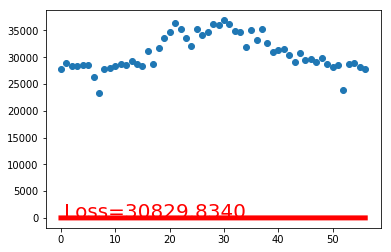

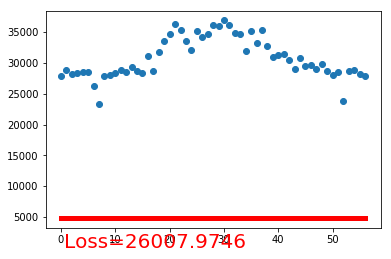

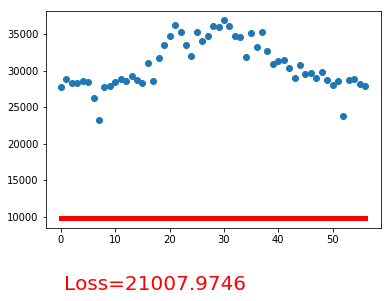

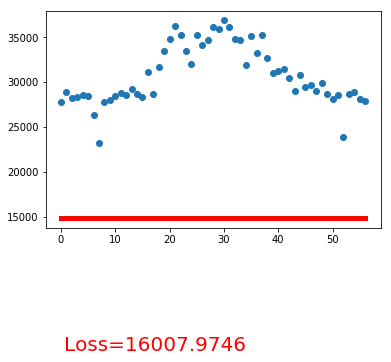

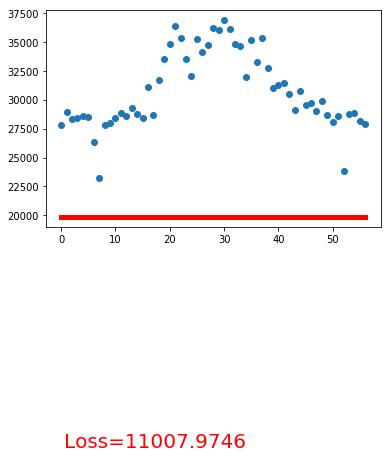

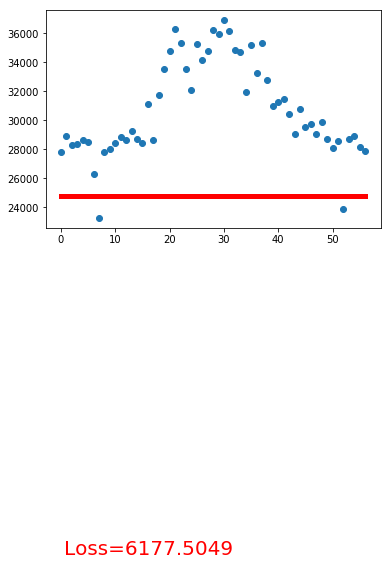

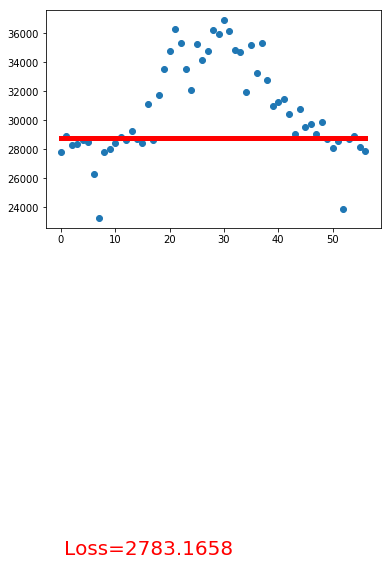

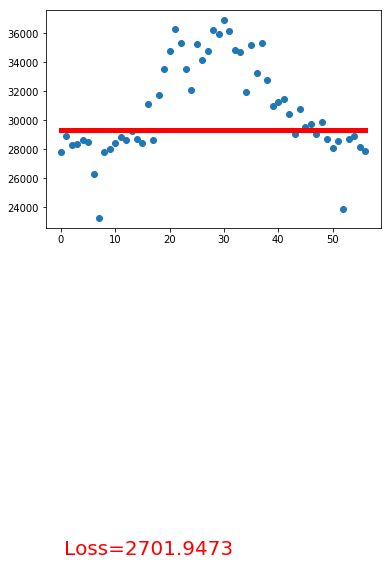

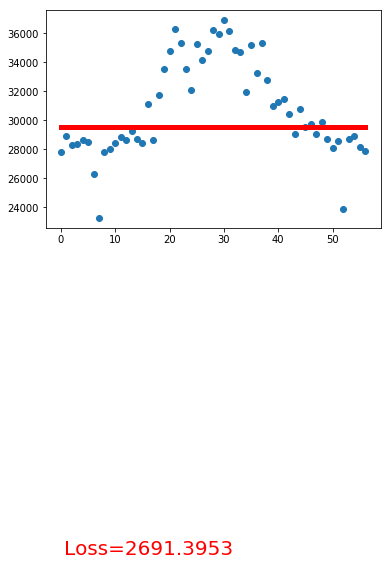

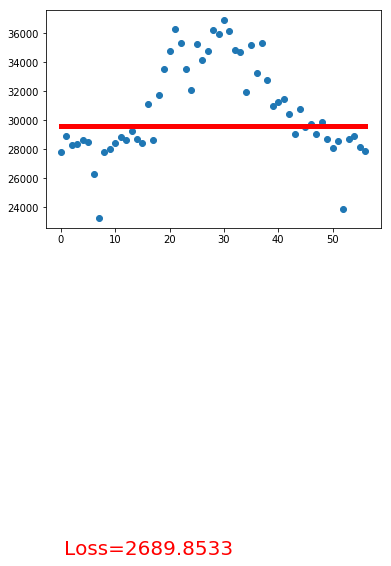

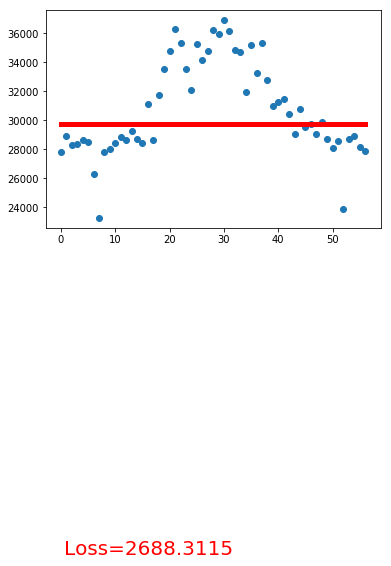

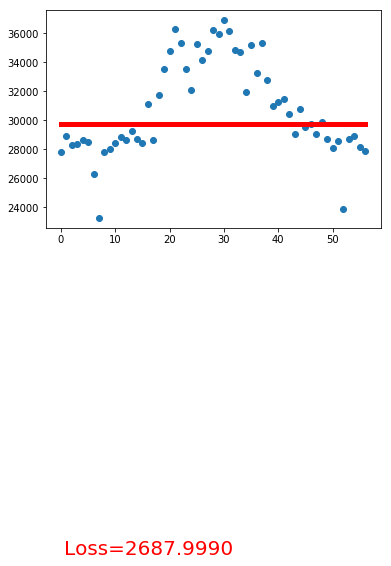

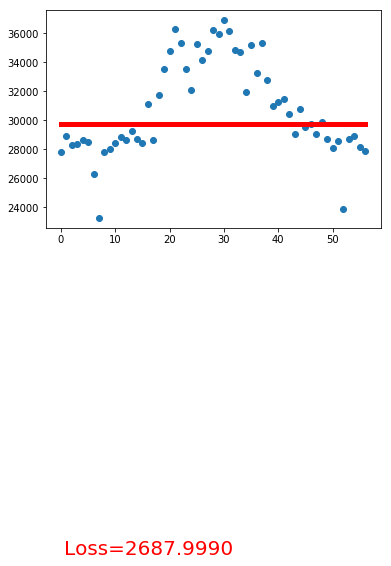

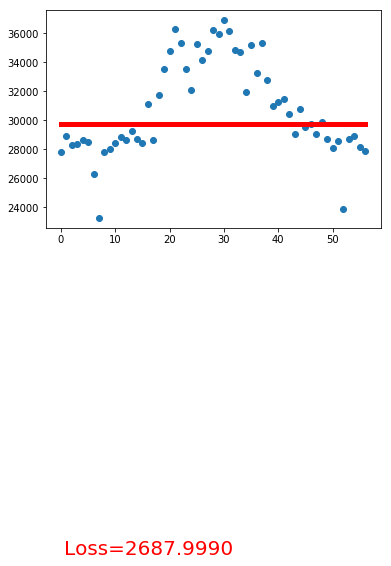

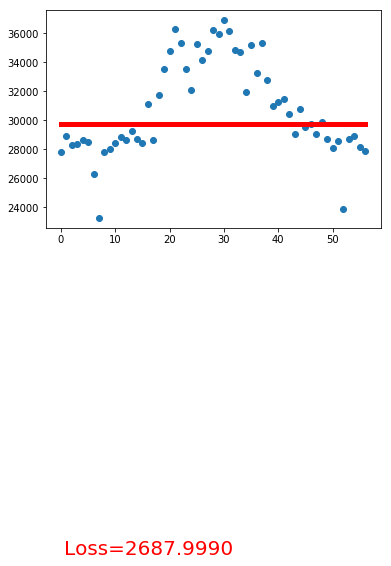

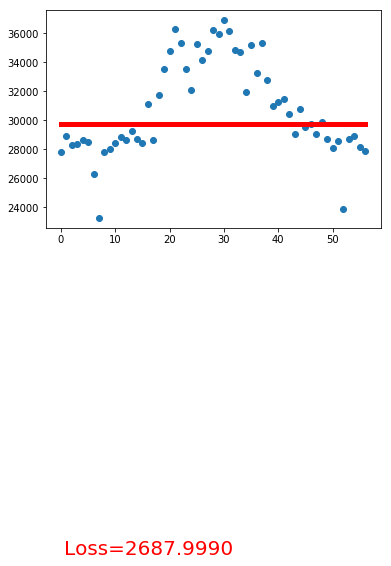

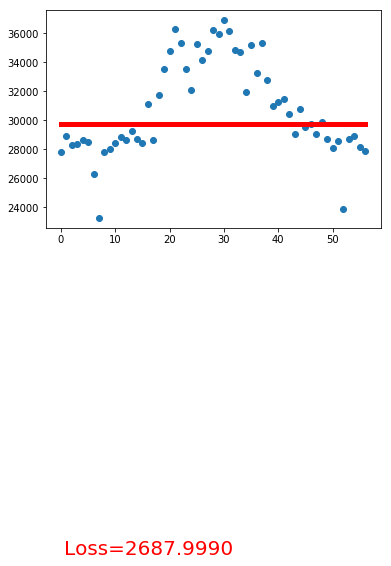

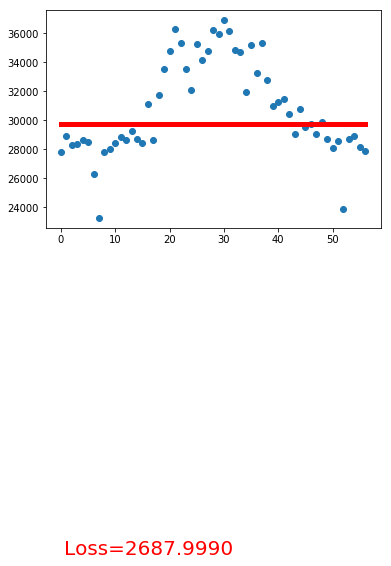

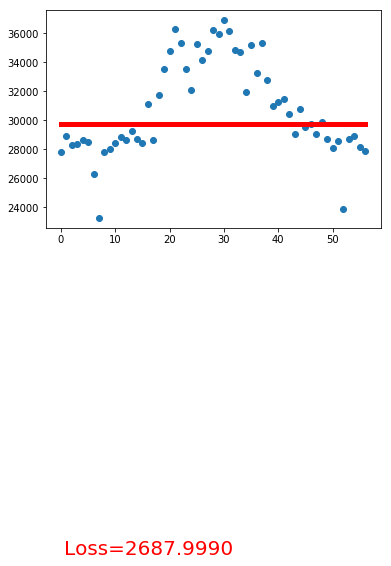

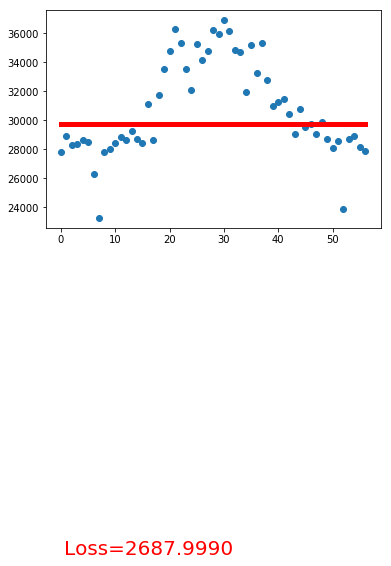

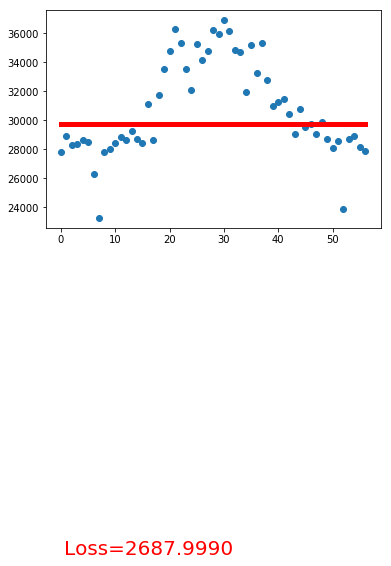

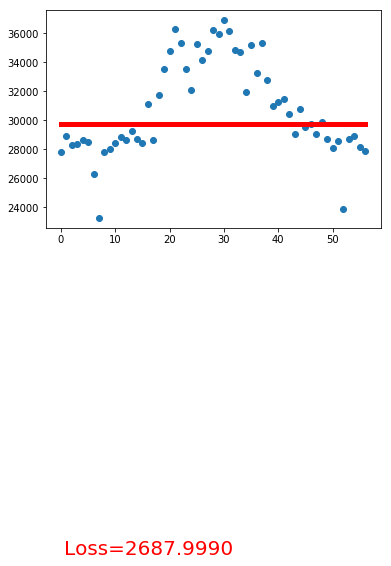

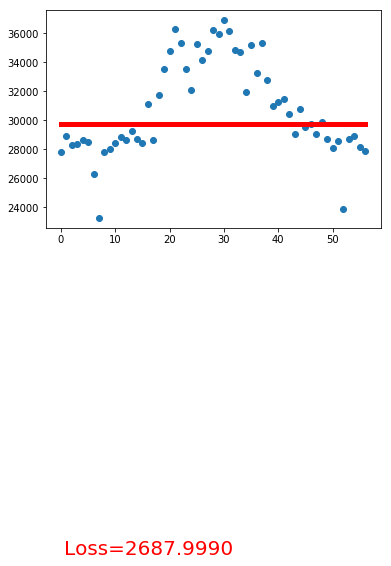

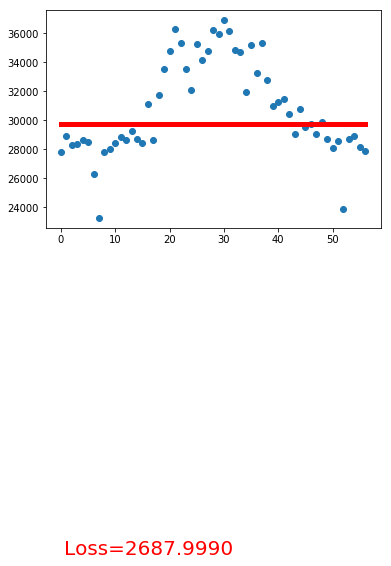

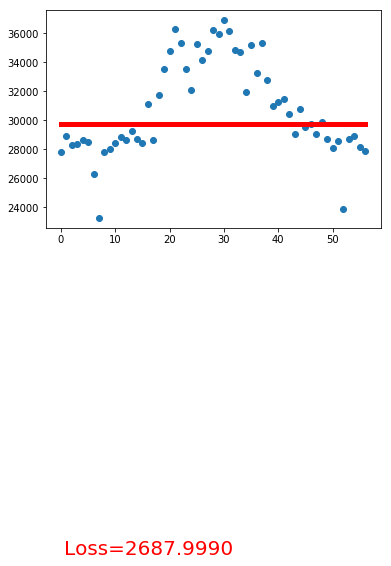

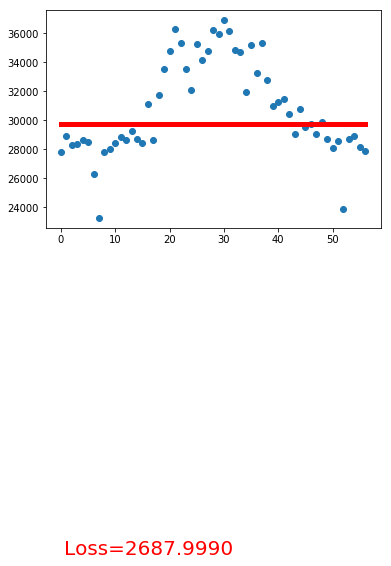

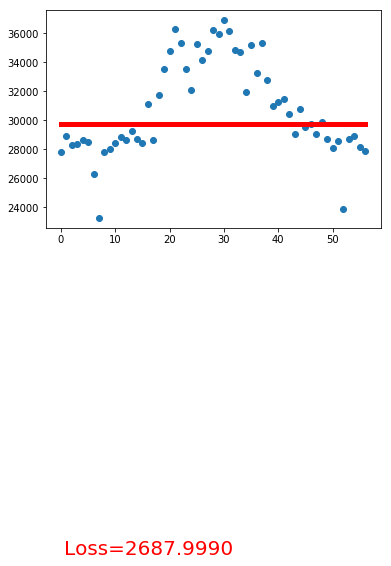

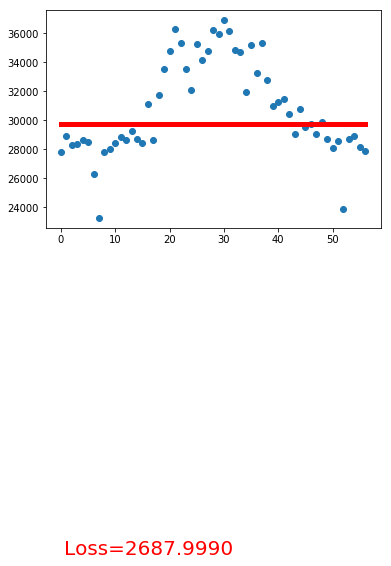

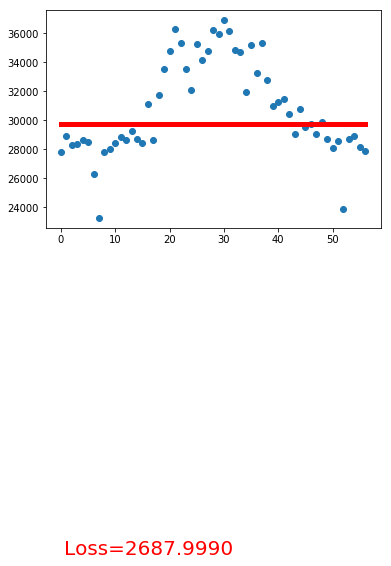

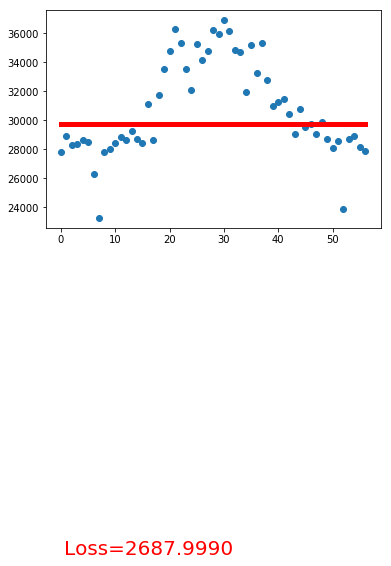

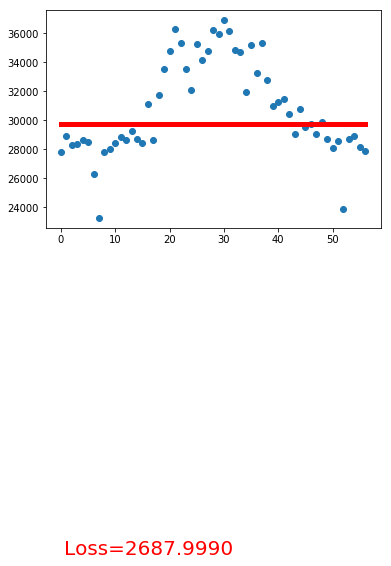

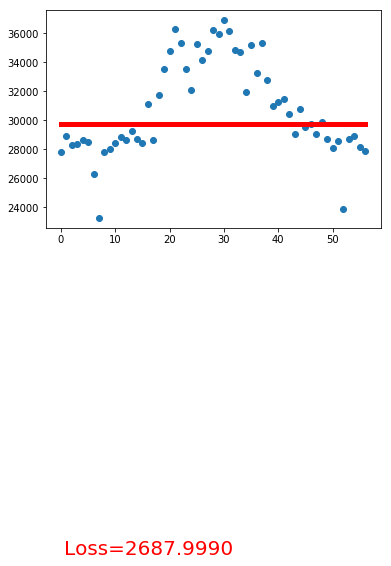

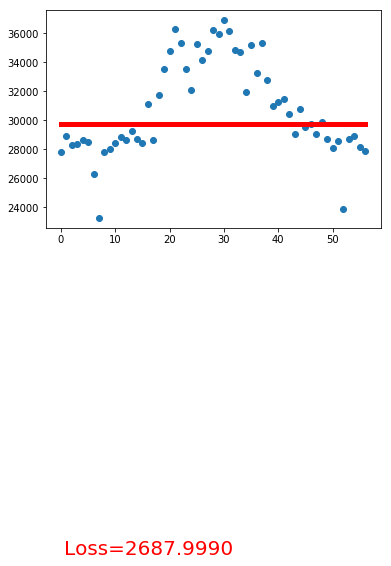

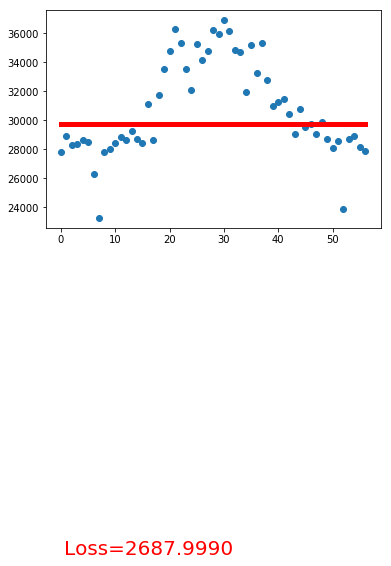

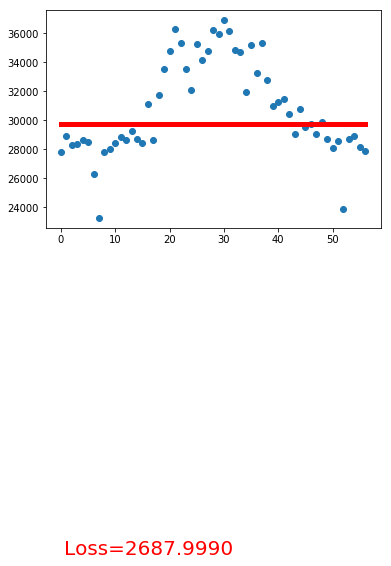

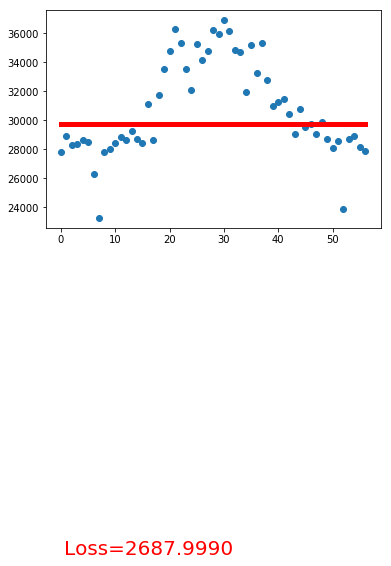

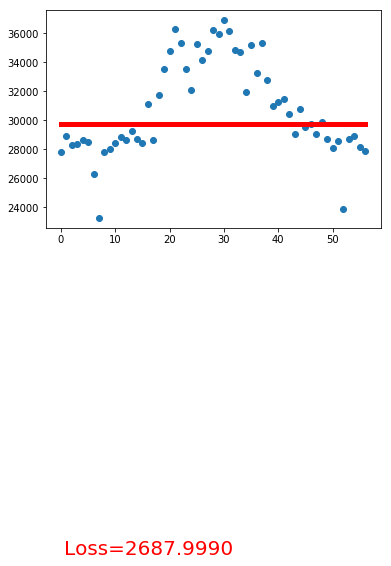

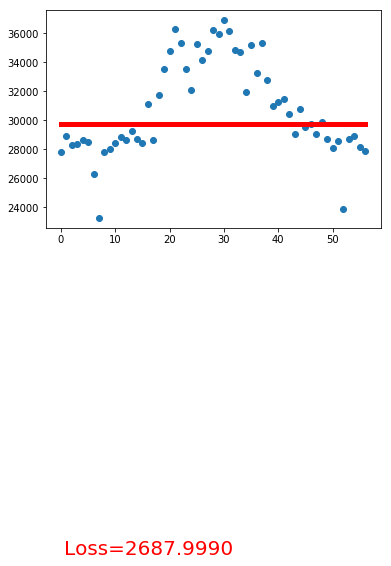

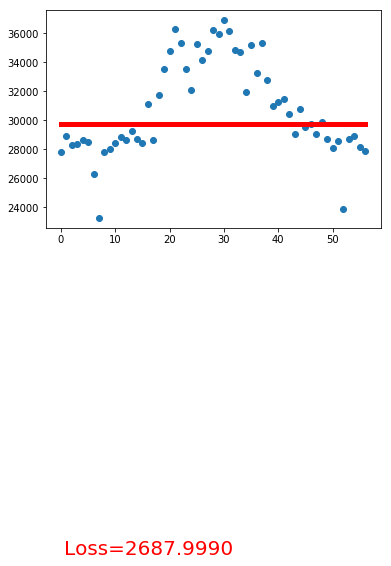

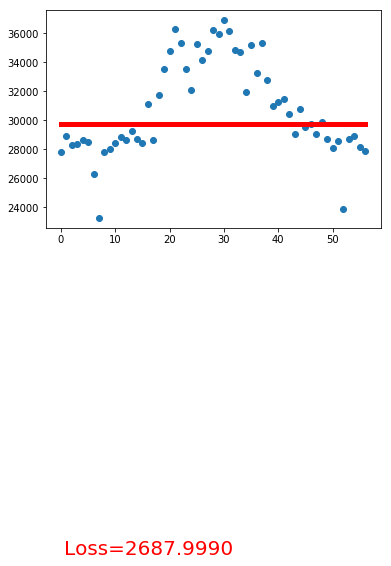

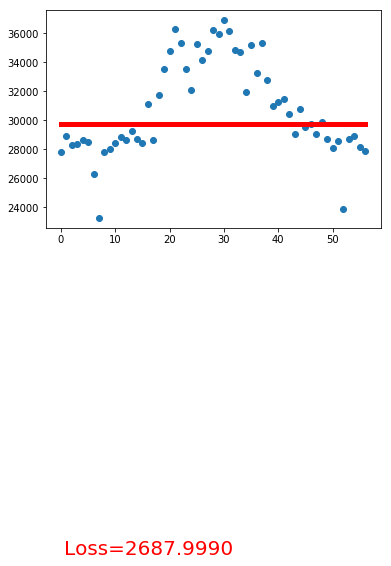

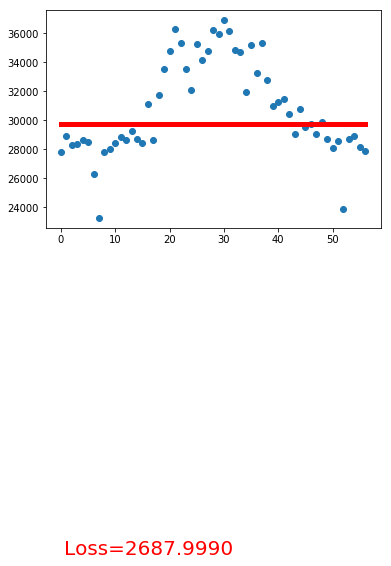

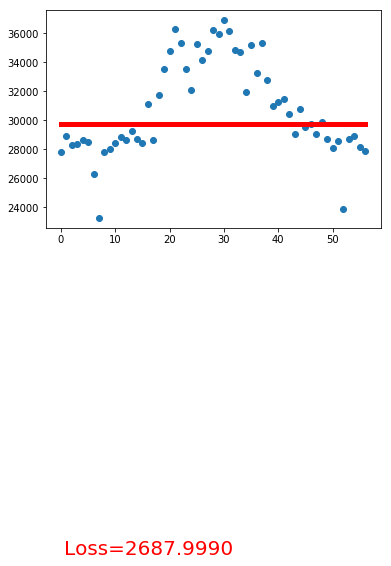

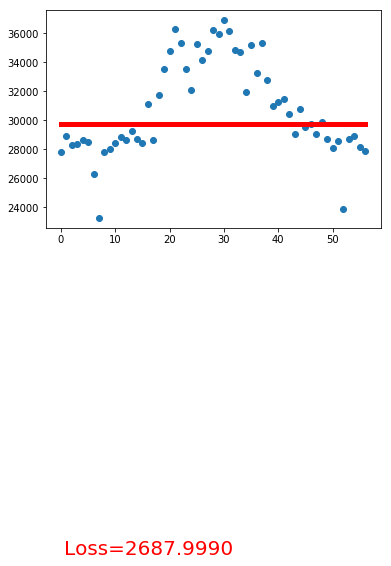

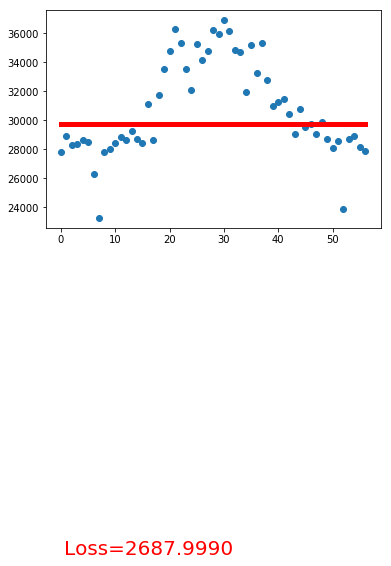

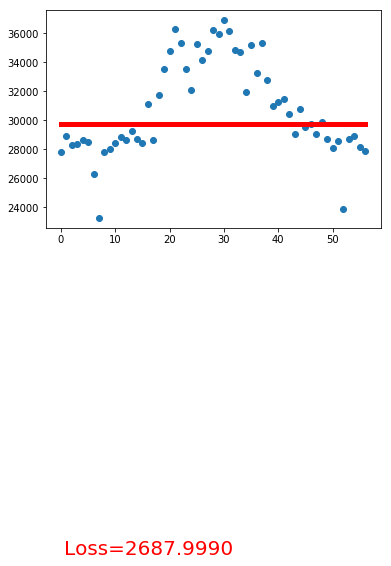

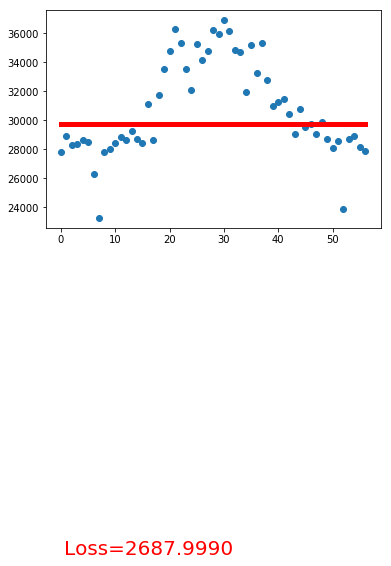

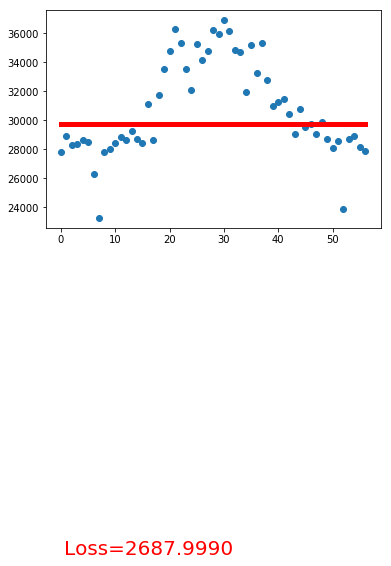

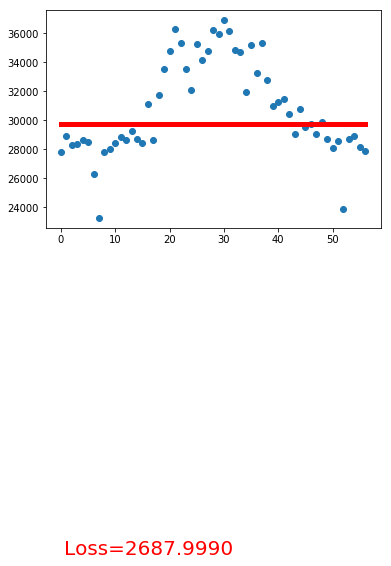

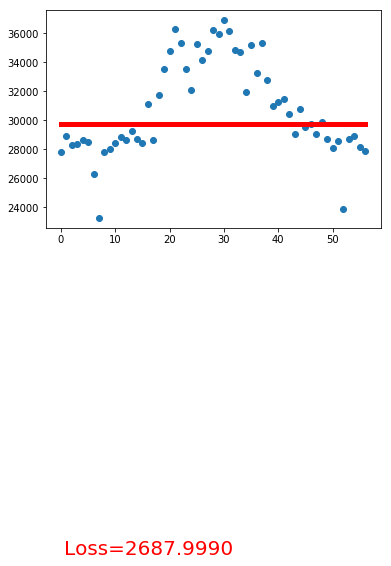

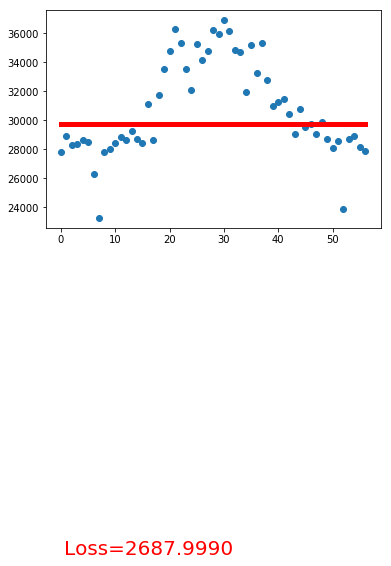

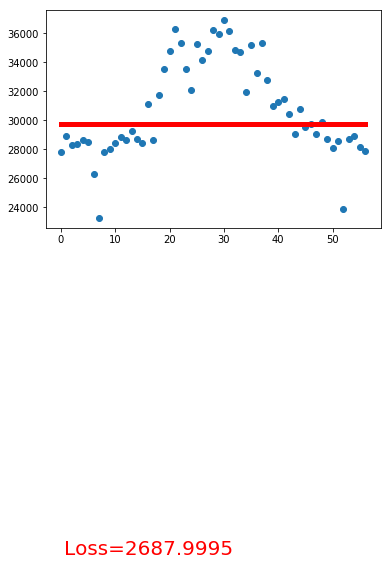

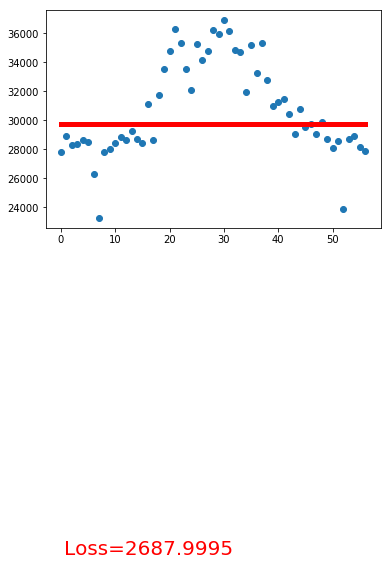

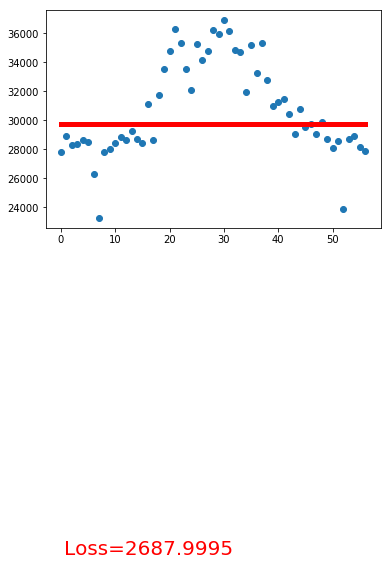

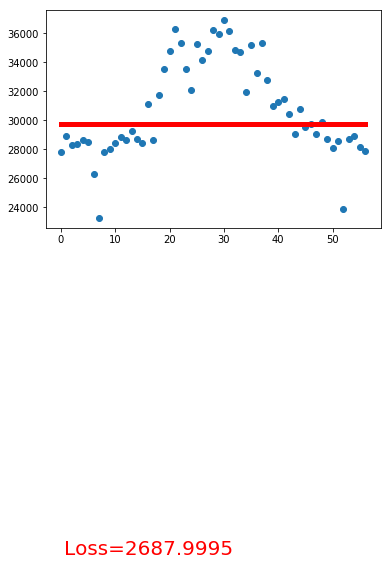

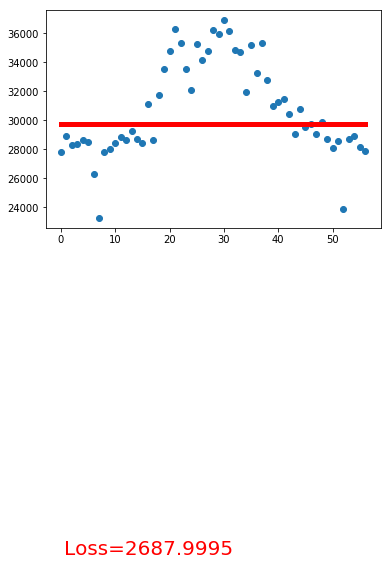

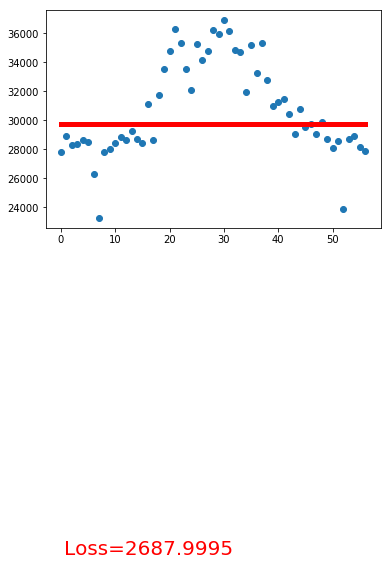

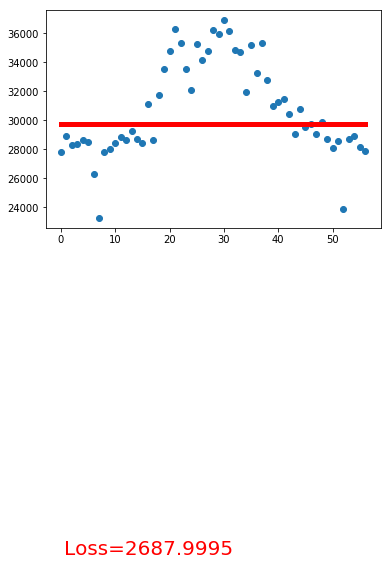

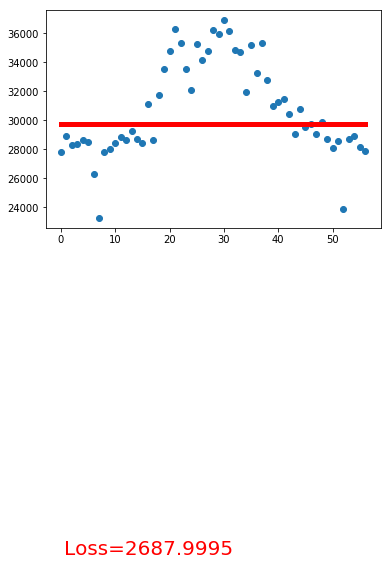

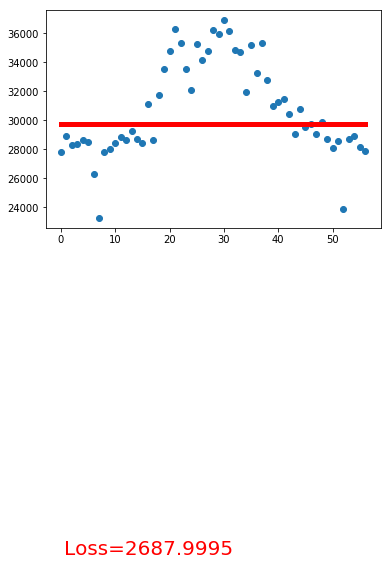

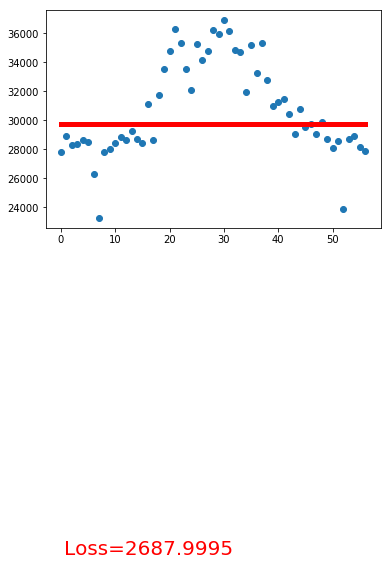

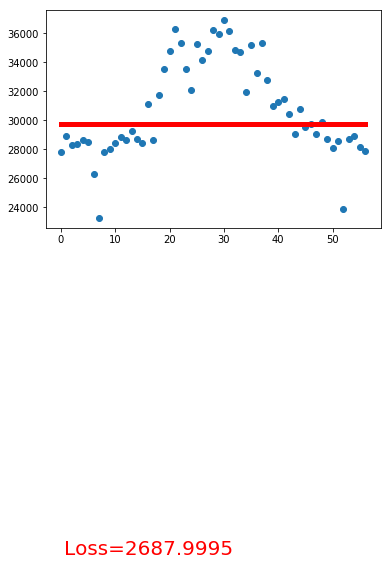

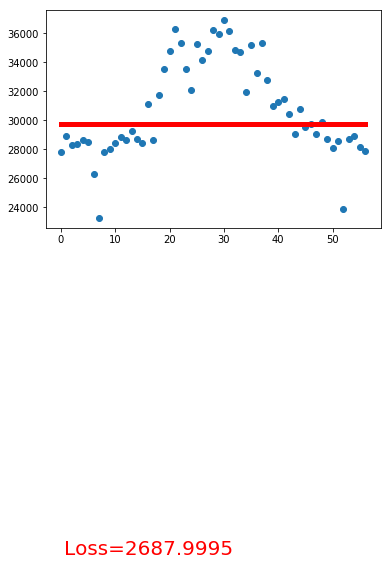

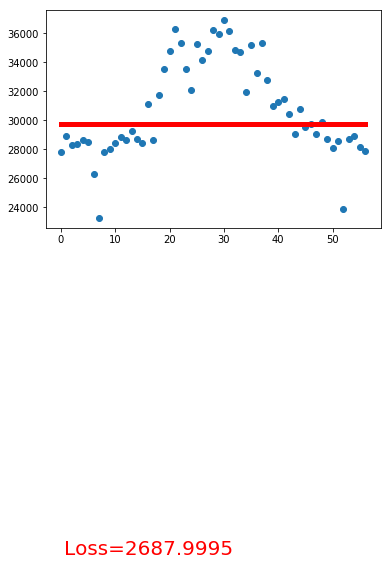

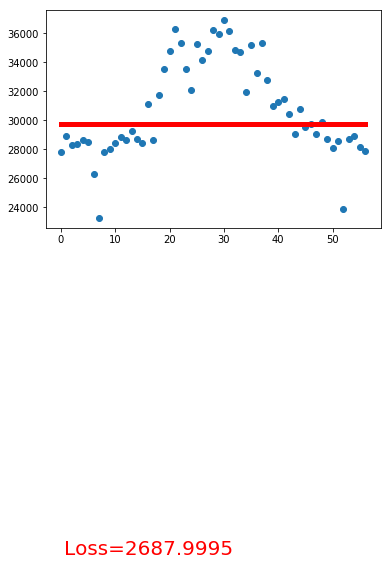

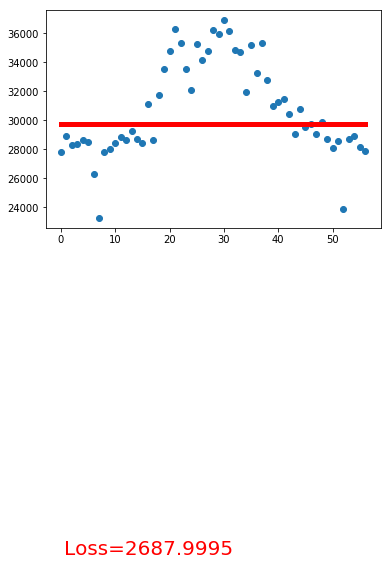

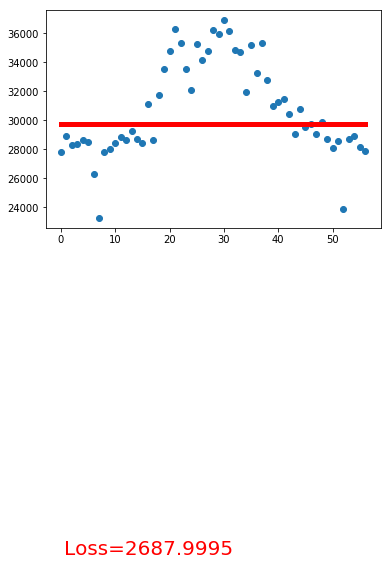

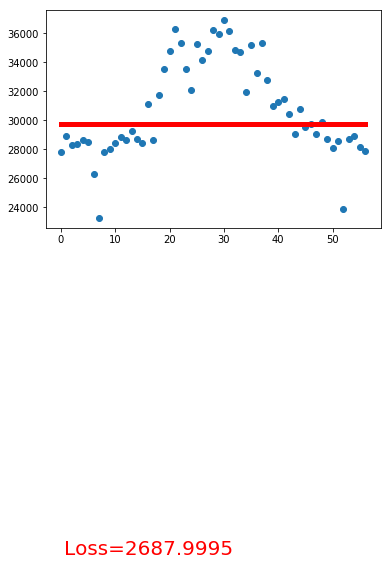

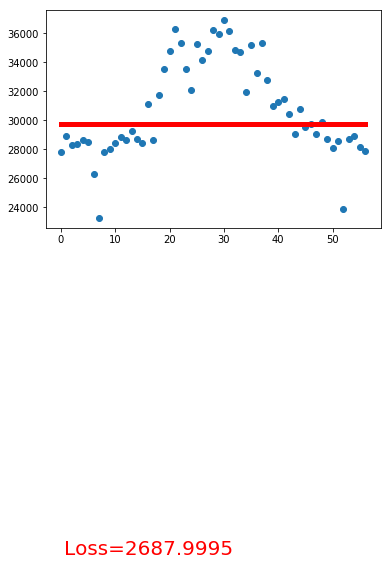

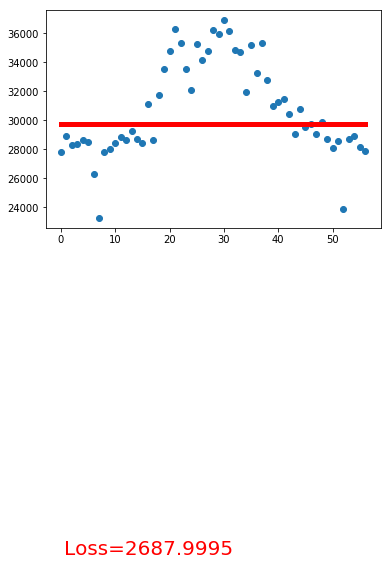

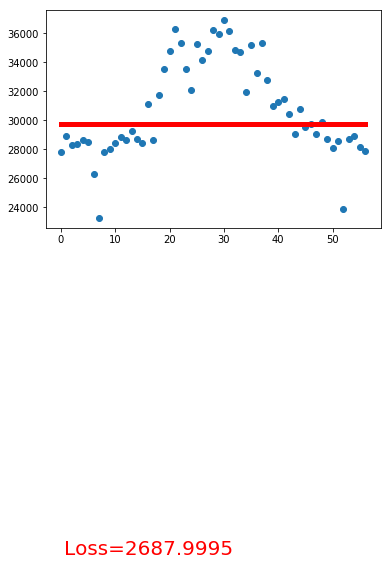

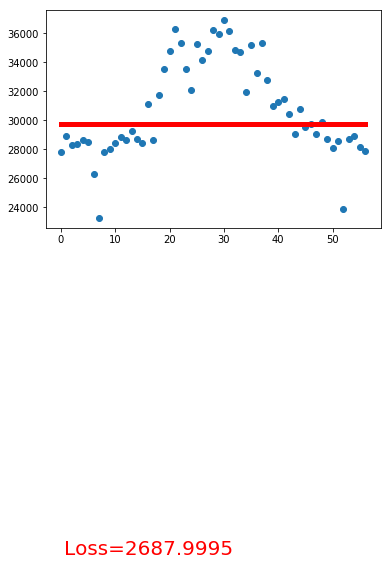

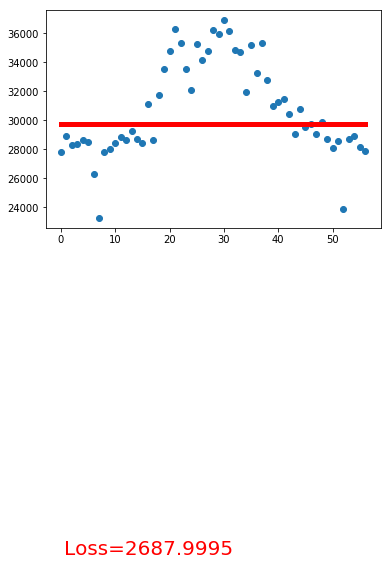

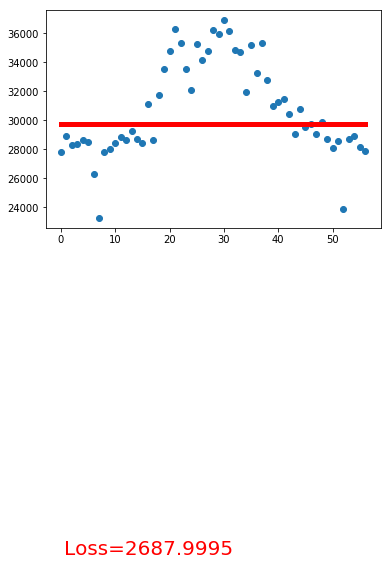

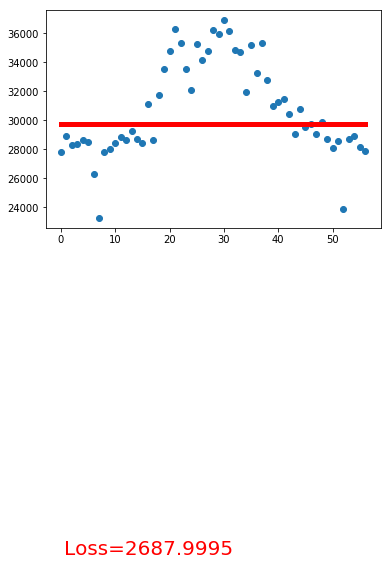

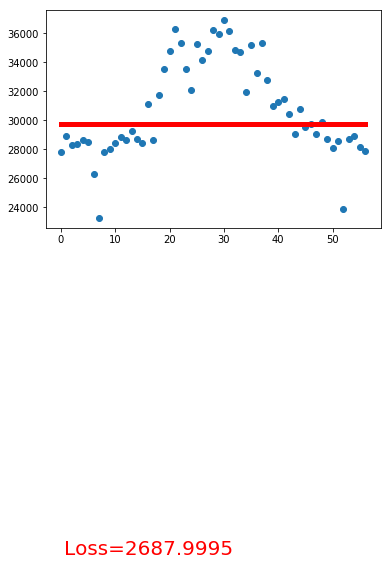

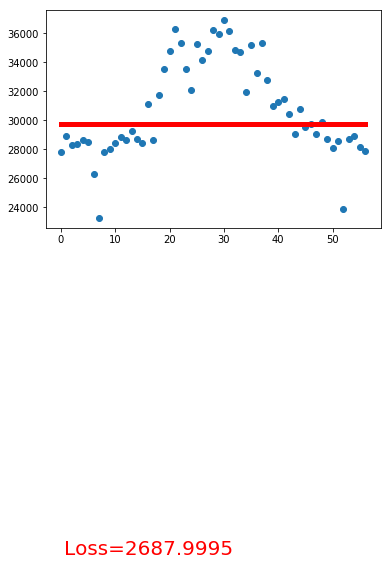

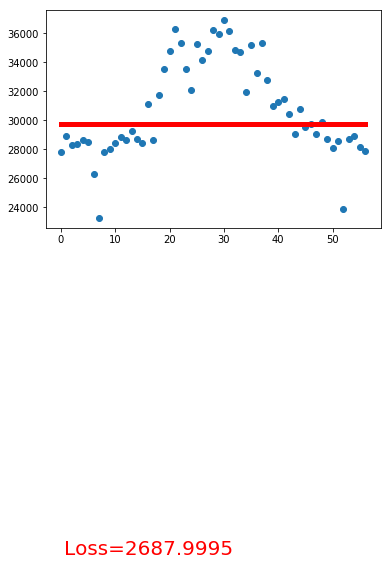

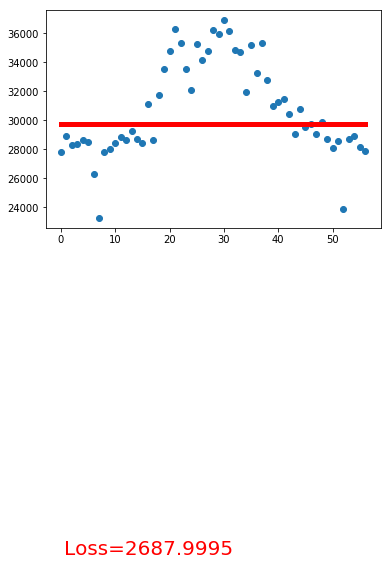

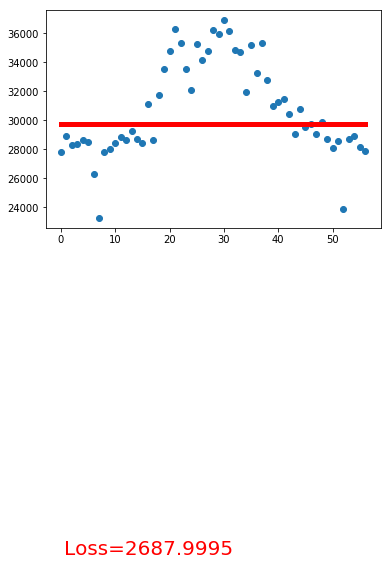

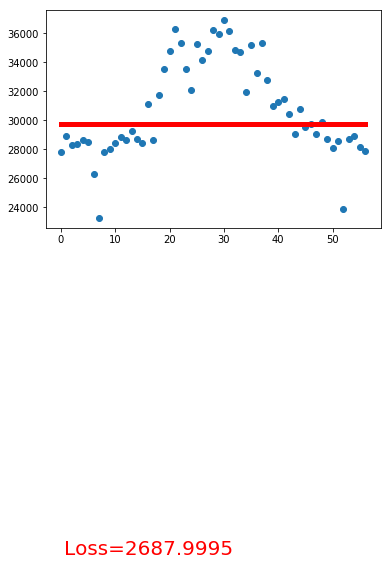

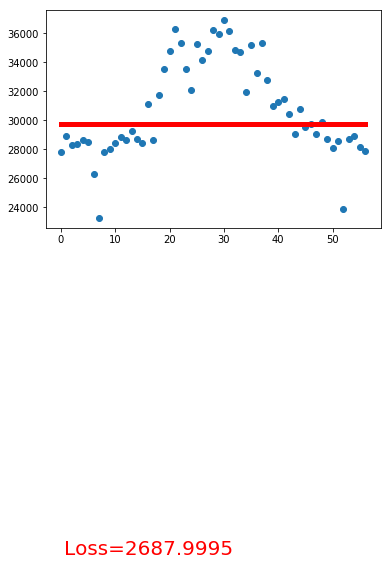

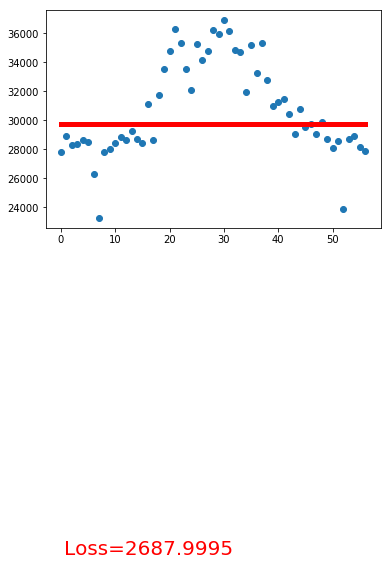

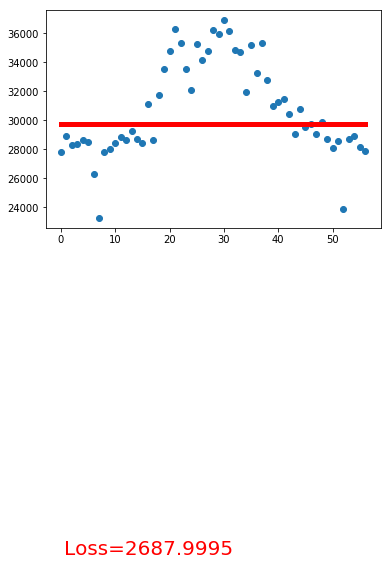

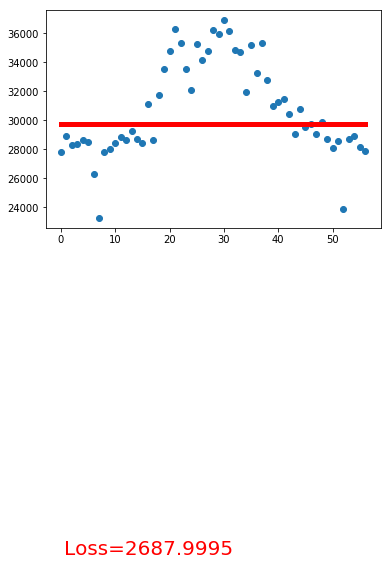

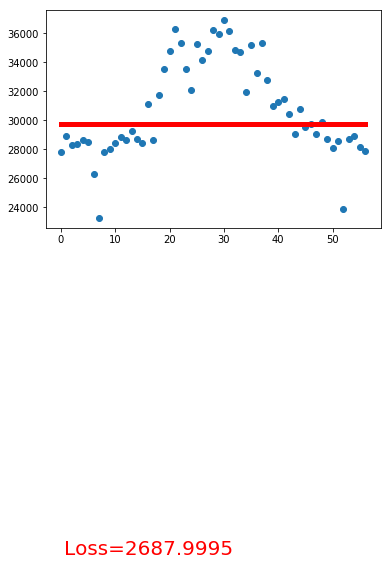

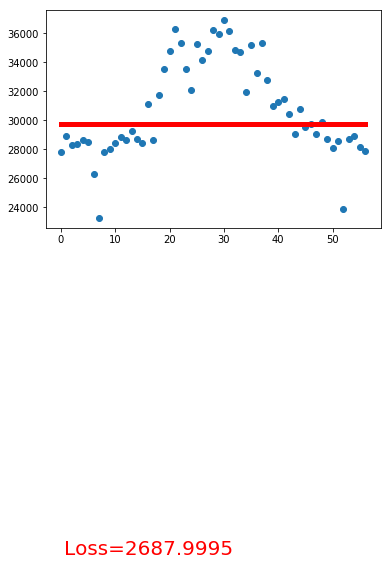

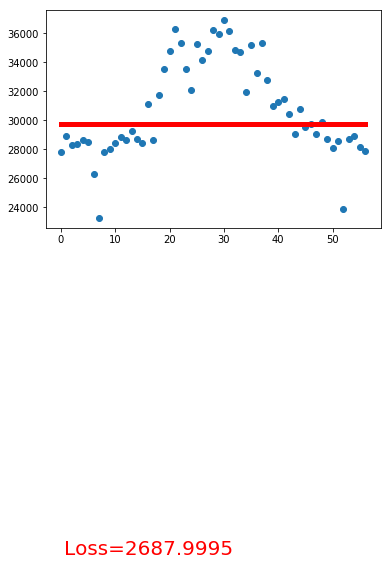

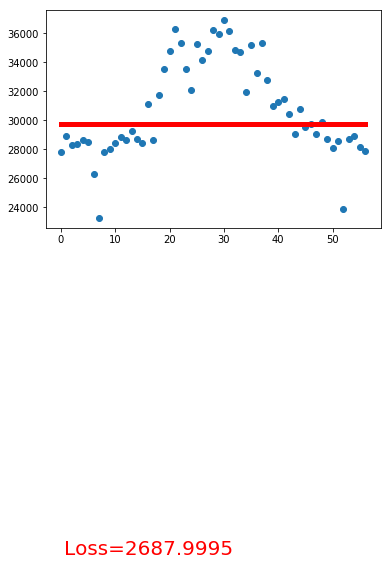

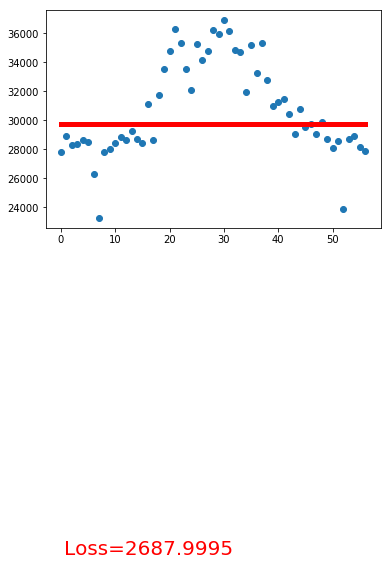

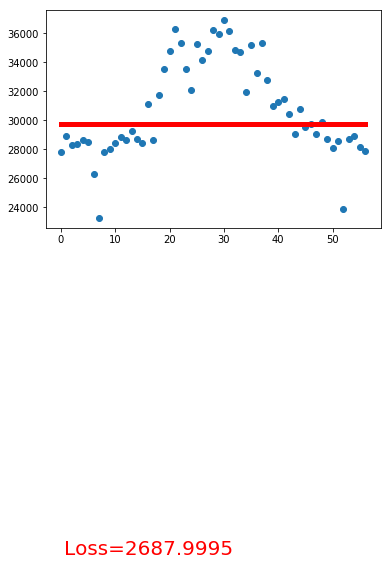

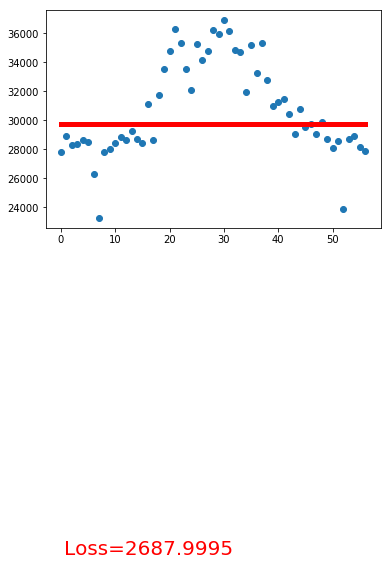

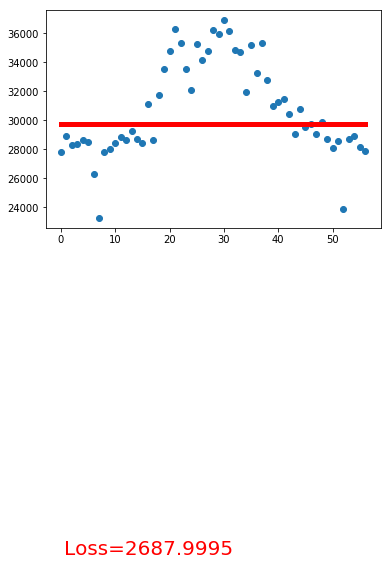

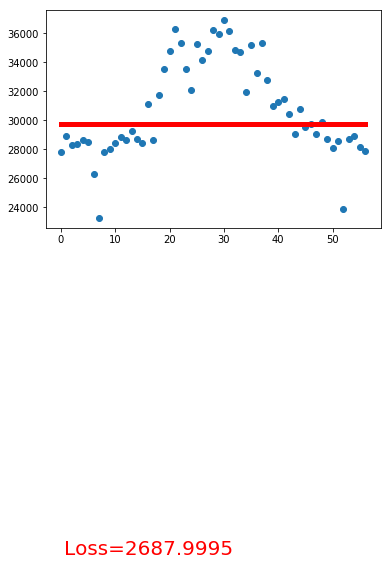

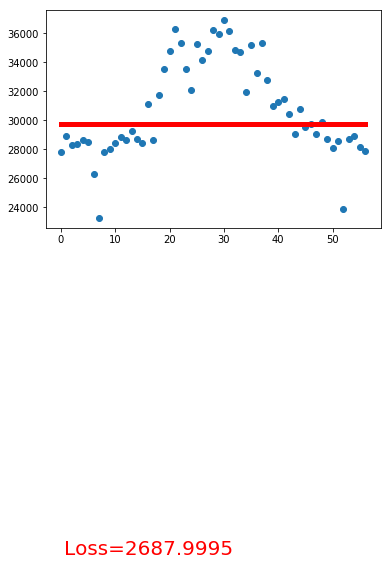

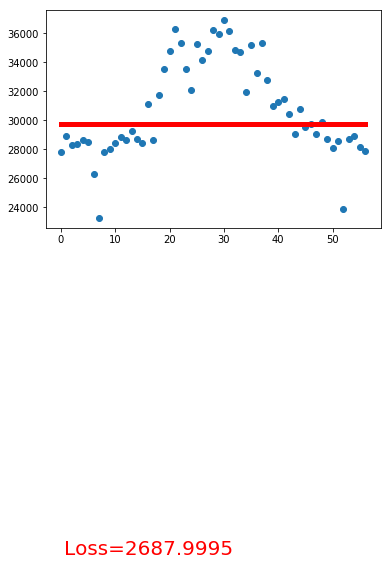

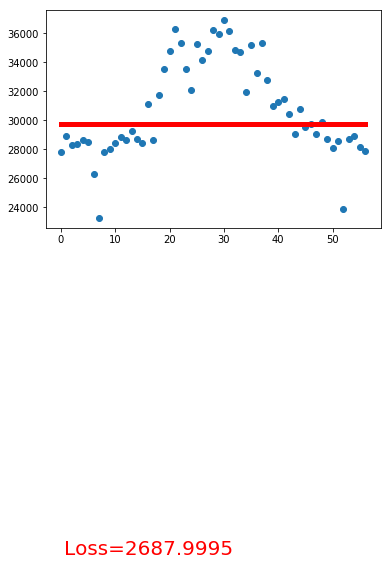

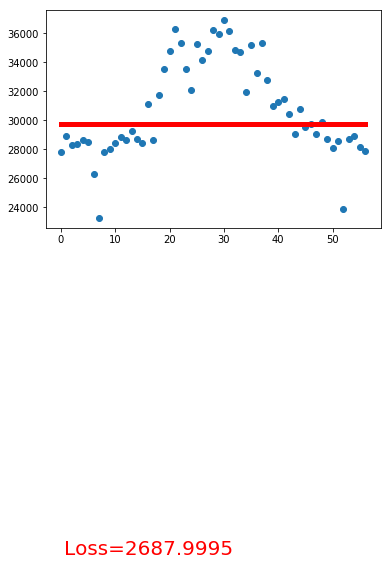

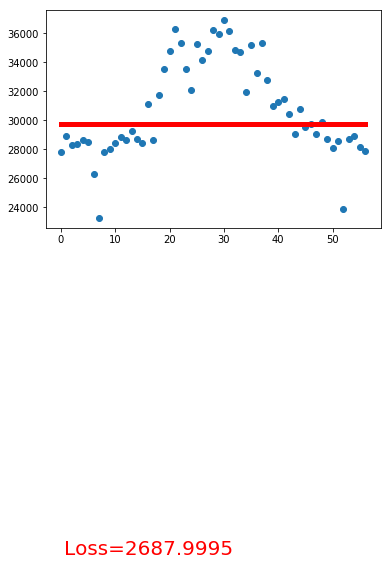

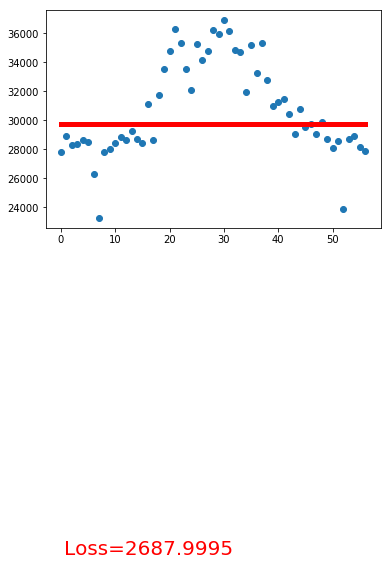

In [12]:
N1.tanining()

In [199]:
def train(epoch):
    for step in range(2000):
        prediction = net(x)     # input x and predict based on x

        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        if step % 500 == 0:
                print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.data.numpy()))
        #print("Finish")

In [200]:
for epoch in range(1,EPOCH):
    train(epoch)

Train Epoch: 1 	Loss: 794456320.000000
Train Epoch: 1 	Loss: 12019860.000000
Train Epoch: 1 	Loss: 12019860.000000
Train Epoch: 1 	Loss: 12019860.000000
Train Epoch: 2 	Loss: 12019860.000000
Train Epoch: 2 	Loss: 12019860.000000
Train Epoch: 2 	Loss: 12019860.000000
Train Epoch: 2 	Loss: 12019860.000000
Train Epoch: 3 	Loss: 12019860.000000
Train Epoch: 3 	Loss: 12019860.000000
Train Epoch: 3 	Loss: 12019860.000000
Train Epoch: 3 	Loss: 12019860.000000
Train Epoch: 4 	Loss: 12019860.000000
Train Epoch: 4 	Loss: 12019860.000000
Train Epoch: 4 	Loss: 12019860.000000
Train Epoch: 4 	Loss: 12019860.000000
Train Epoch: 5 	Loss: 12019860.000000
Train Epoch: 5 	Loss: 12019860.000000
Train Epoch: 5 	Loss: 12019860.000000
Train Epoch: 5 	Loss: 12019860.000000
Train Epoch: 6 	Loss: 12019860.000000
Train Epoch: 6 	Loss: 12019860.000000
Train Epoch: 6 	Loss: 12019860.000000
Train Epoch: 6 	Loss: 12019860.000000
Train Epoch: 7 	Loss: 12019860.000000
Train Epoch: 7 	Loss: 12019860.000000
Train Epoch

In [204]:
labels = Variable(365)
print(lables)

#print(net(396))

TypeError: Variable data has to be a tensor, but got int